# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

sns.set(rc={'figure.figsize':(12,10)})

In [3]:
data=pd.read_csv('titanic.csv')

In [4]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Neumerical Value Analysis




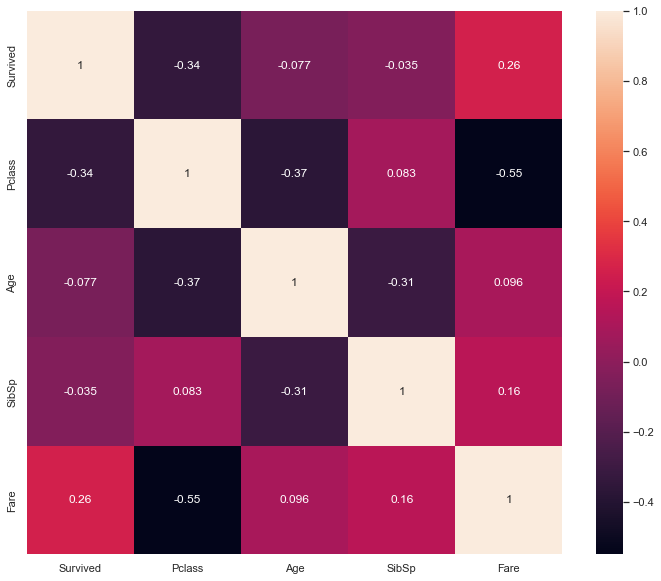

In [12]:
heatmap =sns.heatmap(data[["Survived","Pclass","Age","SibSp","Fare"]].corr(), annot= True)

### <font color = orange> Conclusion   
     We can see that 'Fare' feature has highest co-relation with 'Survived'.
     Let's explore other features having some co-relation value with my output 'Survived'. 


### <font color = purple> SibSp - Number of siblings/ spouses aboard Titanic </font>

In [13]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

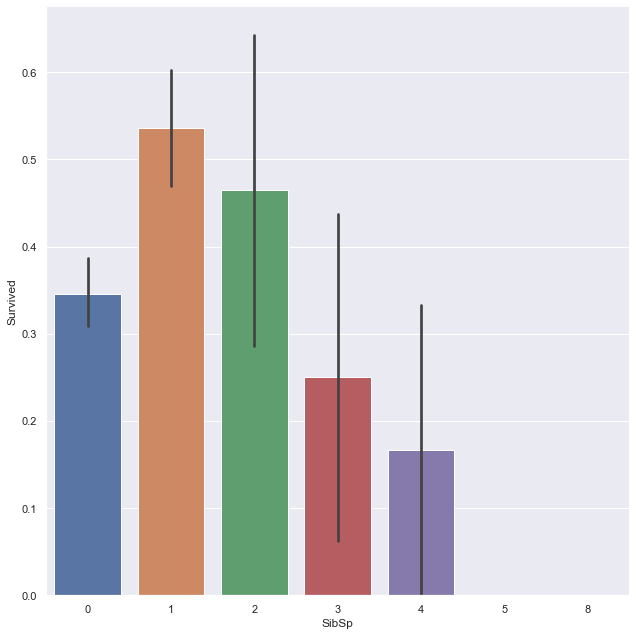

In [43]:
bargraph_SibSp_vs_Survived=sns.catplot(x="SibSp",y="Survived",data=data,kind="bar",height=9)

### <font color = orange> Conclusion
         We see that passengers having more number of Siblings/Spouses have less chance of survival ,in comparision to those having zero,one or two Siblings/Spouses.

### <font color= purple> Age </font>

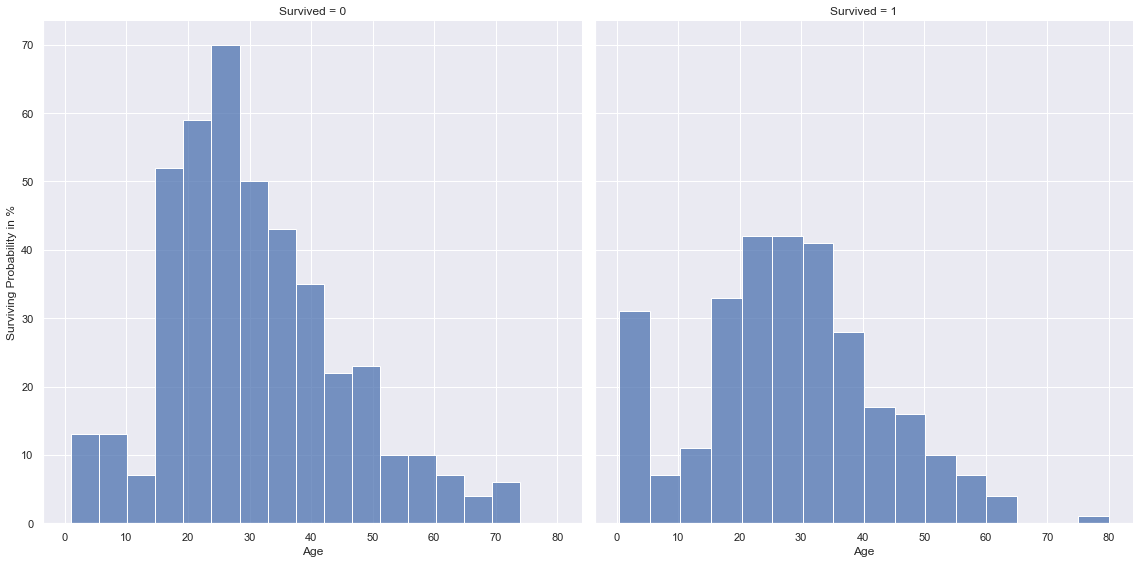

In [24]:
Age_graph= sns.FacetGrid(data, col='Survived',height=8)
Age_graph= Age_graph.map(sns.histplot,"Age")
Age_graph= Age_graph.set_ylabels("Surviving Probability in %")

### <font color = orange> Conclusion   
         We can conclude that passengers of Age between 20 to 40 has more survival probability.

### <font color = purple>Gender </font>

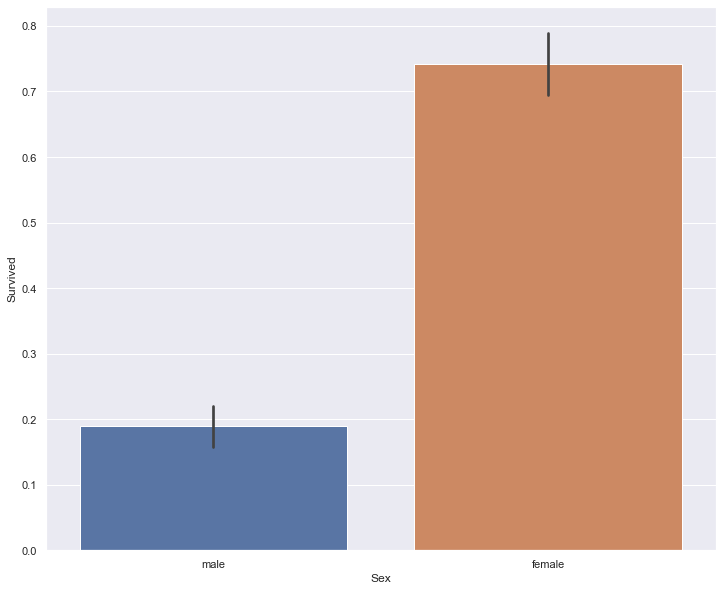

In [45]:
Gender_graph=sns.barplot(x="Sex",y="Survived",data=data)

In [30]:
data[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


### <font color = orange> Conclusion
           We can conclude from Bar-graph and mathematical figures that % of men survived was less in comparision to % of women survived.

### <font color = purple>Pclass (Passenger Class) </font>

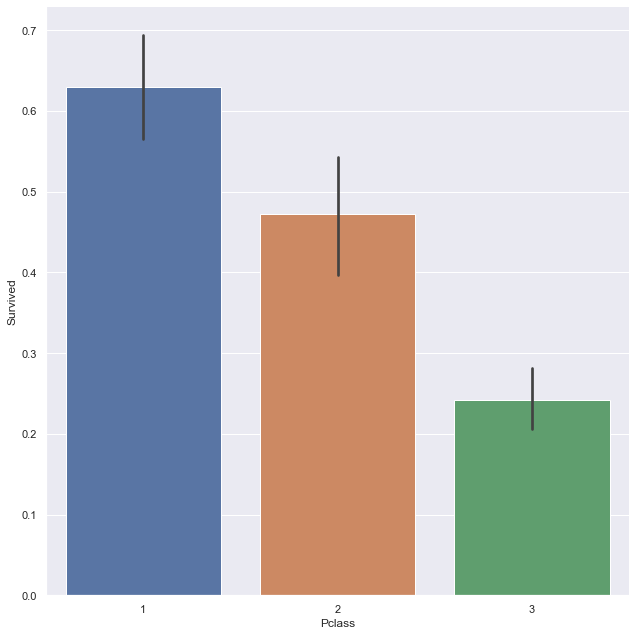

In [42]:
Pclass_graph=sns.catplot(x="Pclass",y="Survived",data=data,kind="bar",height=9)

### <font color = orange> Conclusion
           We can see that passengers of 1st class have survived more than the passengers of 2nd and 3rd class.

### <font color = purple>Pclass (Passenger Class) Survived considering Gender</font> 

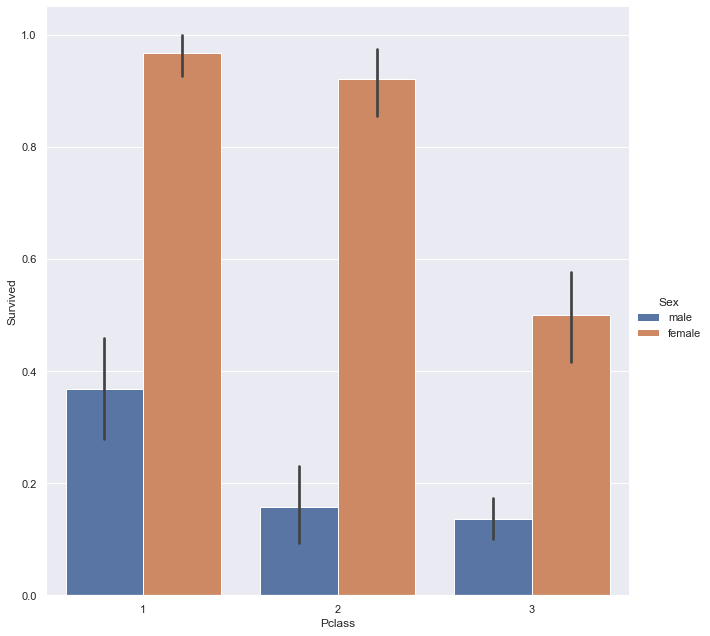

In [48]:
Pclass_Gender_graph=sns.catplot(x="Pclass",y="Survived",hue="Sex",data=data,height=9,kind="bar")

### <font color = orange> Conclusion 
        Females who booked their tickets in Class 1 and Class 2 have survived more than other passengers.

### <font color = purple>Embarked</font> 

In [49]:
data["Embarked"].isnull().sum()

2

In [50]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [51]:
data["Embarked"]=data["Embarked"].fillna('S')

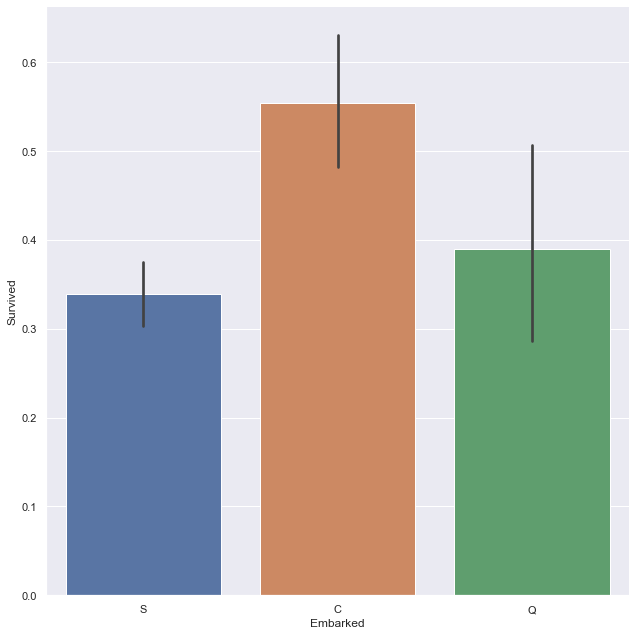

In [53]:
Embarked_graph=sns.catplot(x="Embarked",y="Survived",data=data,height=9,kind="bar")

Here, 
 
 S stands for South-hampton
 
 C stands for Cherbourg
 
 Q stands for Queenstown

### <font color = orange> Conclusion
         Passengers from Cherbourg survived more than that from South-hampton or Quenstown

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


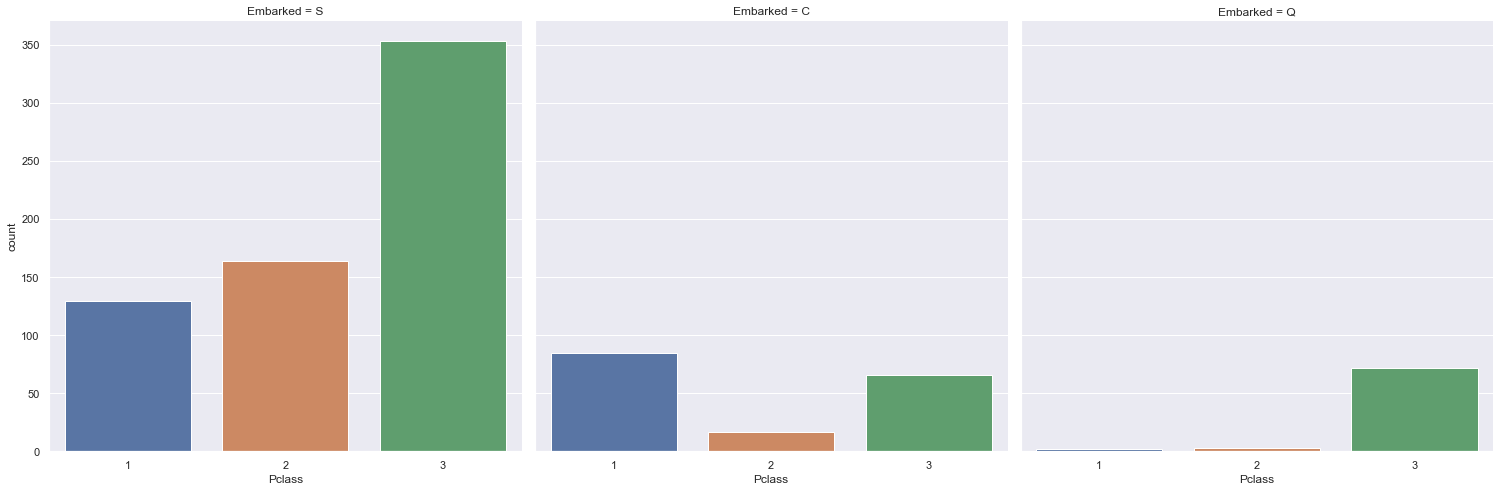

In [61]:
Survival_wrt_Class_and_Embarked=sns.catplot("Pclass",col="Embarked",data=data,height=7,kind="count")

# Preparing Data

In [63]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### <font color = orange> Conclusion
          We can see that there are some missing vlues in 'Age' and 'Cabin' columns.
 

In [65]:
mean_Age= data["Age"].mean()
mean_Age

29.69911764705882

In [66]:
std_Age= data["Age"].std()
std_Age

14.526497332334044

In [67]:
null_Age= data["Age"].isnull().sum()
null_Age

177

####          <font color = pink> Filling null values in 'Age' column </font>

In [69]:
fill_Age=np.random.randint(mean_Age-std_Age,mean_Age+std_Age,size=null_Age)
new_Age=data["Age"].copy()
new_Age[np.isnan(new_Age)]=fill_Age
data["Age"]=new_Age

In [70]:
data["Age"].isnull().sum()

0

In [71]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


####          <font color = magenta> Filling null values in 'Embarked' column </font>


In [72]:
data["Embarked"]=data["Embarked"].fillna("C")

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### <font color = magenta> As some columns like 'Passenger id' , 'Cabin' , 'Ticket' , 'Name'  have no contribution in deciding wether the passenger survives or not, so we can drop these columns</font>

In [79]:
drop_columns=["PassengerId","Name","Cabin","Ticket"]
data.drop(drop_columns,axis=1,inplace=True)

In [80]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,15.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


#### <font color= magenta> Mapping gender to mathematical values ; I am using 0 for 'Male' and 1 for 'Female'. </font>

In [90]:
Genders={"male" :0, "female" :1}
data["Sex"]=data["Sex"].map(Genders)

In [91]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,NaN,22.0,1,0,7.2500,S
1,1,1,NaN,38.0,1,0,71.2833,C
2,1,3,NaN,26.0,0,0,7.9250,S
3,1,1,NaN,35.0,1,0,53.1000,S
4,0,3,NaN,35.0,0,0,8.0500,S
5,0,3,NaN,15.0,0,0,8.4583,Q
6,0,1,NaN,54.0,0,0,51.8625,S
7,0,3,NaN,2.0,3,1,21.0750,S
8,1,3,NaN,27.0,0,2,11.1333,S
9,1,2,NaN,14.0,1,0,30.0708,C


In [89]:
data["Sex"].isnull().sum()

891

In [92]:
data_call_again=pd.read_csv('titanic.csv')

In [94]:
data["Sex"]=data_call_again["Sex"]

In [95]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,15.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [96]:
genders_mapping={"male" :0, "female" :1}
data["Sex"]=data["Sex"].map(genders_mapping)

In [97]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
5,0,3,0,15.0,0,0,8.4583,Q
6,0,1,0,54.0,0,0,51.8625,S
7,0,3,0,2.0,3,1,21.0750,S
8,1,3,1,27.0,0,2,11.1333,S
9,1,2,1,14.0,1,0,30.0708,C


#### <font color= magenta> Mapping Embarked to mathematical values ; I am using 0 for 'South-hampton' , 1 for 'Cherbourg' and 2 for 'Queenstown'. </font>

In [98]:
boarding_port={"S":0,"C":1,"Q":2}
data["Embarked"]=data["Embarked"].map(boarding_port)

In [99]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,15.0,0,0,8.4583,2
6,0,1,0,54.0,0,0,51.8625,0
7,0,3,0,2.0,3,1,21.0750,0
8,1,3,1,27.0,0,2,11.1333,0
9,1,2,1,14.0,1,0,30.0708,1


#### <font color =magenta> As now entire dataframe is in neumeric form, we can start Splitting and training it. </font>

In [104]:
input_data=data.drop(data.columns[[0]],axis=1)
output_data=data["Survived"]

In [105]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [106]:
input_data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
5,3,0,15.0,0,0,8.4583,2
6,1,0,54.0,0,0,51.8625,0
7,3,0,2.0,3,1,21.0750,0
8,3,1,27.0,0,2,11.1333,0
9,2,1,14.0,1,0,30.0708,1


In [107]:
output_data.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(input_data,output_data,test_size=0.30,random_state=0)

In [119]:
from sklearn.preprocessing import StandardScaler
stnd_scalr=StandardScaler()

xtrain=stnd_scalr.fit_transform(xtrain)
xtest=stnd_scalr.transform(xtest)

## <font color= orange> Modelling

In [121]:
log_Reg= LogisticRegression()
svc_classifier= SVC()
dtree_classifier= DecisionTreeClassifier()
knn_classifier= KNeighborsClassifier(5)
rf_classifier= RandomForestClassifier(n_estimators=1000,criterion='entropy',random_state=0)

In [122]:
log_Reg.fit(xtrain,ytrain)
svc_classifier.fit(xtrain,ytrain)
dtree_classifier.fit(xtrain,ytrain)
knn_classifier.fit(xtrain,ytrain)
rf_classifier.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [123]:
log_Reg_predict = log_Reg.predict(xtest)
svc_classifier_predict = svc_classifier.predict(xtest)
dtree_classifier_predict = dtree_classifier.predict(xtest)
knn_classifier_predict = knn_classifier.predict(xtest)
rf_classifier_predict = rf_classifier.predict(xtest)

In [124]:
from sklearn.metrics import accuracy_score

In [125]:
accuracy_score(ytest,log_Reg_predict)

0.6417910447761194

In [126]:
accuracy_score(ytest,svc_classifier_predict)

0.6268656716417911

In [127]:
accuracy_score(ytest,dtree_classifier_predict)

0.7313432835820896

In [128]:
accuracy_score(ytest,knn_classifier_predict)

0.6791044776119403

In [129]:
accuracy_score(ytest,rf_classifier_predict)

0.6940298507462687

## <font color= green> Result- Decision Tree Classifier is most accurate, and gave accuracy of 73.134%